# Veriye İlk Bakış

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
# veri setinin hikayesi nedir? 

In [3]:
df = planets.copy()

In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [5]:
# veri seti yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
import pandas as pd

In [7]:
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [9]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Veri Setinin Betimlenmesi

In [10]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [11]:
df.shape

(1035, 6)

In [12]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [13]:
df.describe().T # eksik gözlemleri göz ardı eder ve katagorik değişkenleri dışarda tutar

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


# Eksik Değerlerin İncelenmesi

In [15]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [16]:
#Hiç eksik gözlem(değer) var mı?
df.isnull().values.any()

True

In [17]:
#hangi değişkende kaçar tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [18]:
#df['degisken_ismi'].fillna(0, inplace=True) # fillna nanları doldurur

In [19]:
# df["degisken_ismi"].fillna(df.degisken_ismi.mean(), inplace=True)

In [20]:
# df.fillna(df.mean(), inplace=True)# hepsini değiştirir

# Kategorik Değişken Özetleri

In [21]:
kat_df = df.select_dtypes(include=["object"])

In [22]:
kat_df.tail()

,method
1030,Transit
1031,Transit
1032,Transit
1033,Transit
1034,Transit


In [23]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [24]:
kat_df.method.unique().sum()

'Radial VelocityImagingEclipse Timing VariationsTransitAstrometryTransit Timing VariationsOrbital Brightness ModulationMicrolensingPulsar TimingPulsation Timing Variations'

In [25]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [26]:
kat_df["method"].value_counts().count()

10

In [27]:
kat_df.method.value_counts().count()

10

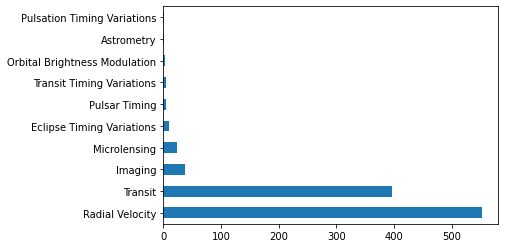

In [28]:
df.method.value_counts().plot.barh();

# Sürekli Değişken Özetleri

In [29]:
df_num = df.select_dtypes(include=["float64", "int64"])

In [30]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [31]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [32]:
df_num.distance.describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

# Dağılım Gradfikleri
* **Barplot (Sutun Grafik): Elimizdeki kategorik değişkenleri görselleştirmek için kullanılır**

In [33]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [36]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [37]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [38]:
# ORDİNAL TANIMLAMA
from pandas.api.types import CategoricalDtype

In [39]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [40]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [41]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [42]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [43]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_kategoriler ,ordered=True))

In [44]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [45]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: object

In [46]:
df.color = df.color.astype(CategoricalDtype(categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'], ordered=True))

In [47]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

In [48]:
# barplot

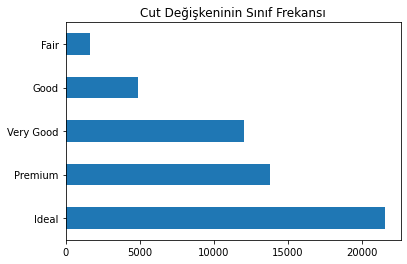

In [49]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansı");

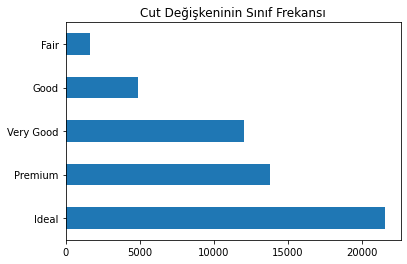

In [50]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansı"));

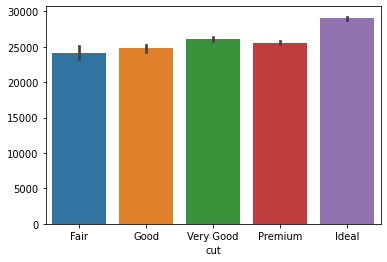

In [51]:
sns.barplot(x="cut", y=df.cut.index, data=df);

# Çaprazlamalar

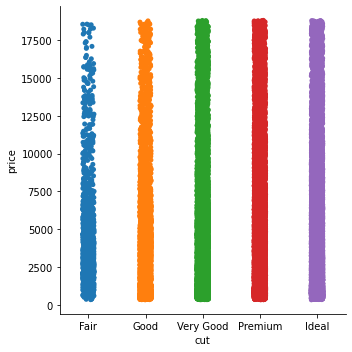

In [52]:
sns.catplot(x="cut", y="price", data=df);

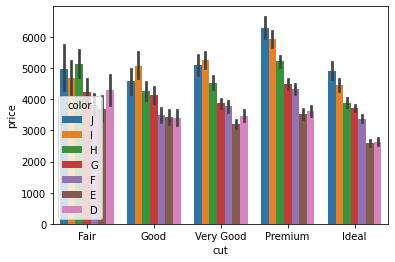

In [53]:
sns.barplot(x="cut", y="price", hue="color", data=df);

In [54]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

# Histogram ve Yoğunluk

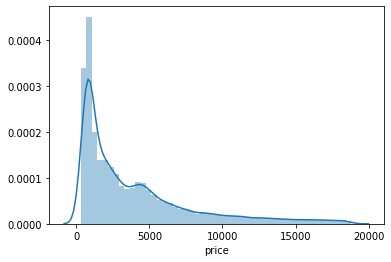

In [55]:
sns.distplot(df.price, kde=True);

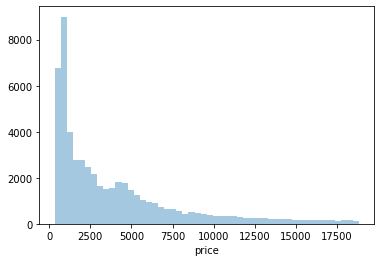

In [56]:
sns.distplot(df.price, kde=False);

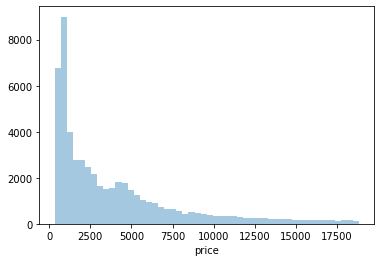

In [57]:
sns.distplot(df.price, bins=50, kde=False);

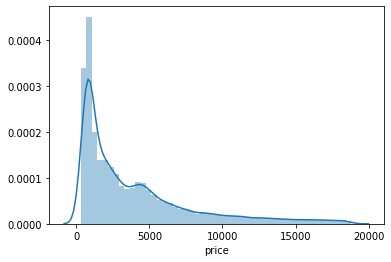

In [58]:
sns.distplot(df.price);

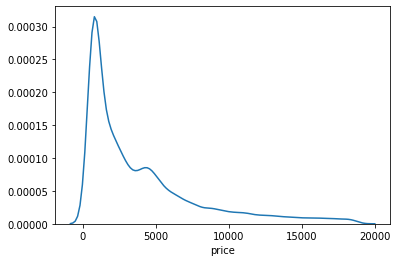

In [59]:
sns.distplot(df.price, hist=False);

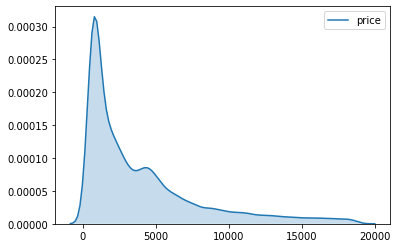

In [60]:
sns.kdeplot(df.price, shade=True);

# Çaprazlamalar

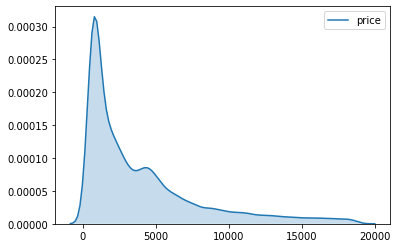

In [61]:
sns.kdeplot(df.price, shade=True);

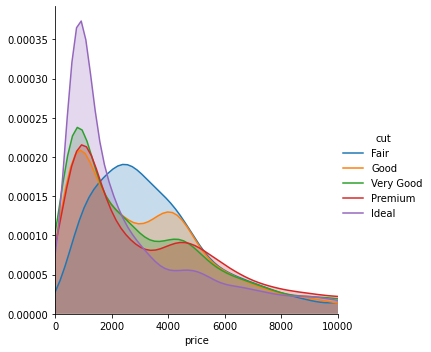

In [62]:
(sns
 .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0, 10000))
 .map(sns.kdeplot, "price", shade=True)
 .add_legend());

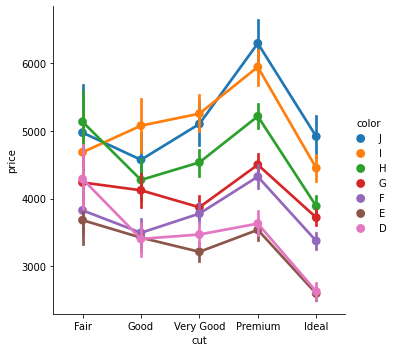

In [63]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df);

# BoxPlot

In [64]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [66]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [67]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [68]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [69]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [70]:
# Boxplot

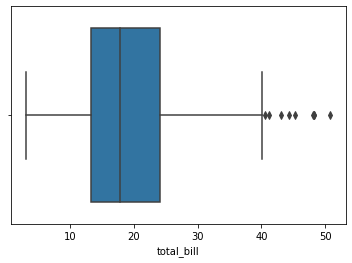

In [71]:
sns.boxplot(x="total_bill", data=df);

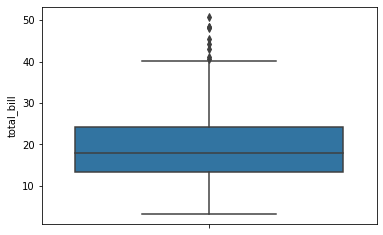

In [72]:
sns.boxplot(x="total_bill", data=df, orient='v'); # vertical

# Çaprazlamalar

In [73]:
# Hangi günler daha fazla kazabıyoruz?

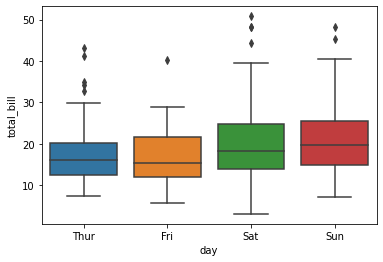

In [74]:
sns.boxplot(x='day', y="total_bill", data=df);

In [75]:
# Sabah mı akşam mı?

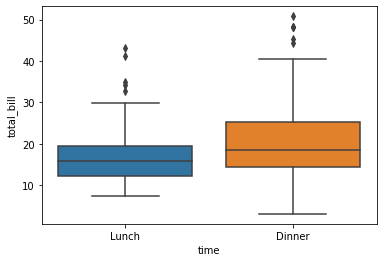

In [76]:
sns.boxplot(x='time', y='total_bill', data=df);

In [77]:
# Kisi sayısı kazanc

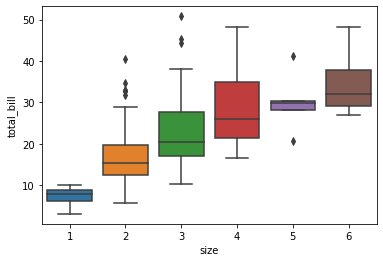

In [78]:
sns.boxplot(x='size', y='total_bill', data=df);

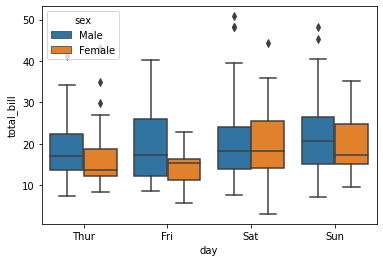

In [79]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=df);

# Violin

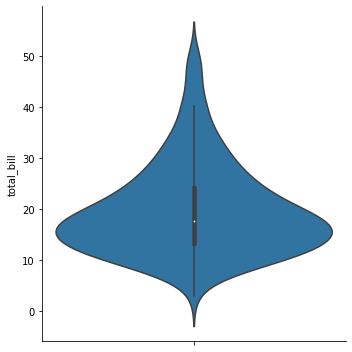

In [80]:
sns.catplot(y="total_bill", kind="violin", data=df);

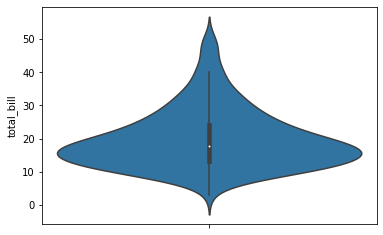

In [81]:
sns.violinplot(y=df.total_bill); # fark ne?

# Violin Grafik Çaprazlama

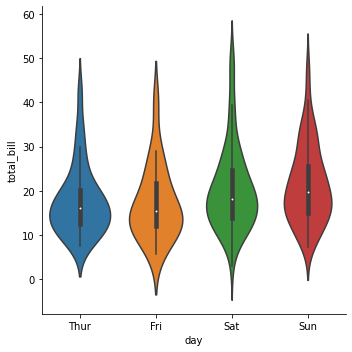

In [82]:
sns.catplot(y="total_bill", kind="violin", data=df, x="day");

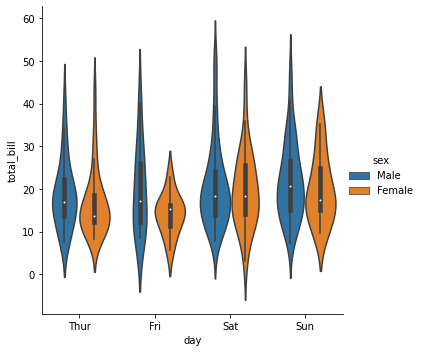

In [83]:
sns.catplot(y="total_bill", kind="violin", data=df, x="day", hue="sex");

# Korelasyon Grafikleri

* **Scatter plot**

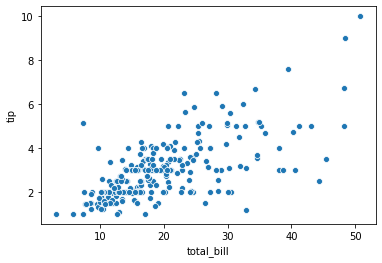

In [84]:
sns.scatterplot(x="total_bill", y="tip", data=df);

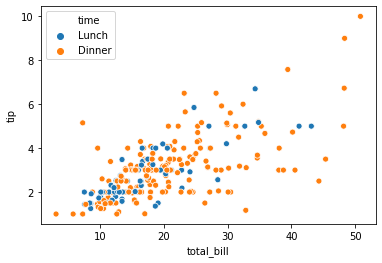

In [85]:
sns.scatterplot(x="total_bill", y="tip", hue='time', data=df);

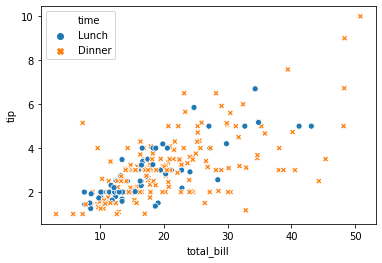

In [86]:
sns.scatterplot(x="total_bill", y="tip", hue='time', data=df, style="time");

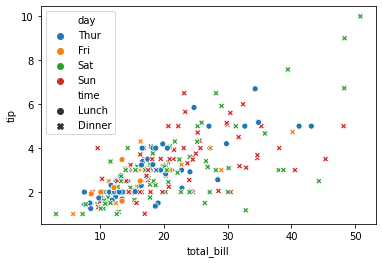

In [87]:
sns.scatterplot(x="total_bill", y="tip", hue='day', data=df, style="time");

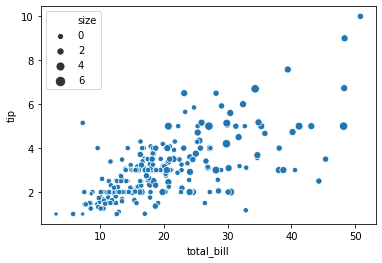

In [88]:
sns.scatterplot(x="total_bill", y="tip", data=df, size="size");

# Doğrusal İlişkinin Gösterilmesi

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

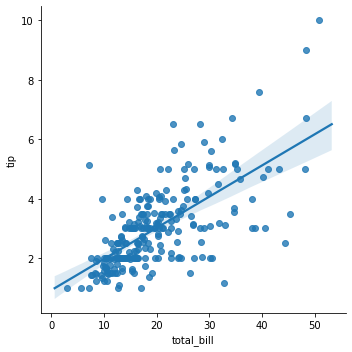

In [90]:
sns.lmplot(x='total_bill', y='tip', data=df);

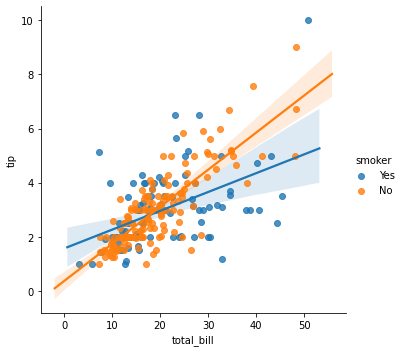

In [91]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df);

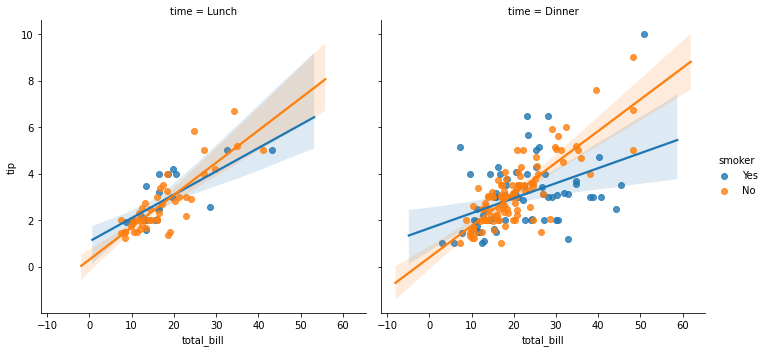

In [92]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=df);

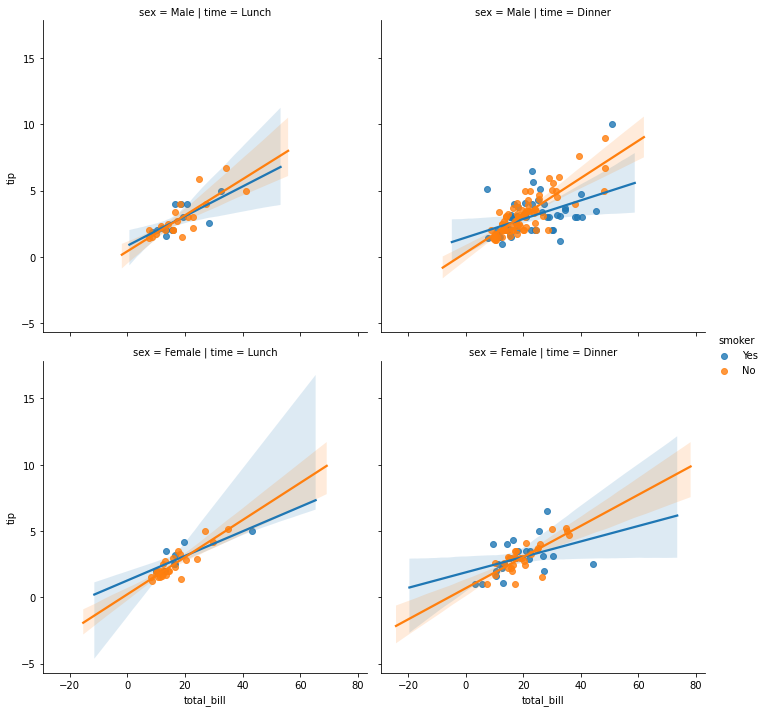

In [93]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=df);

# Scatterplot Matrisi

In [94]:
import seaborn as sns
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [96]:
df.shape

(150, 5)

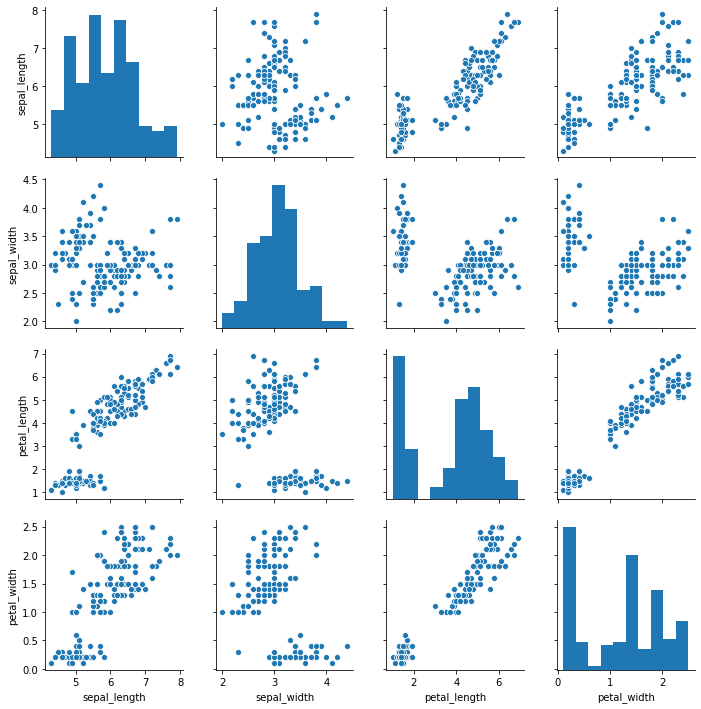

In [97]:
sns.pairplot(df);

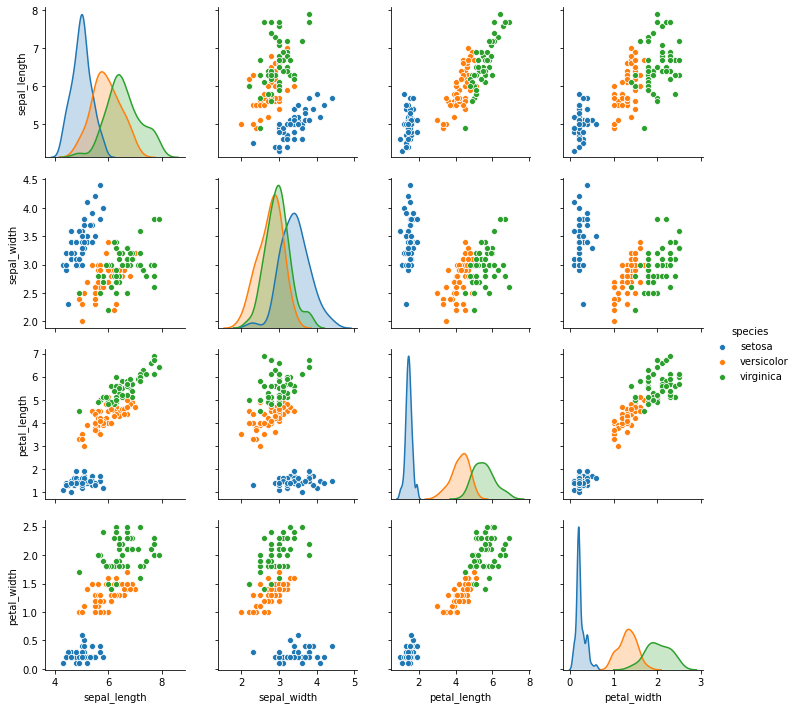

In [98]:
sns.pairplot(df, hue='species');

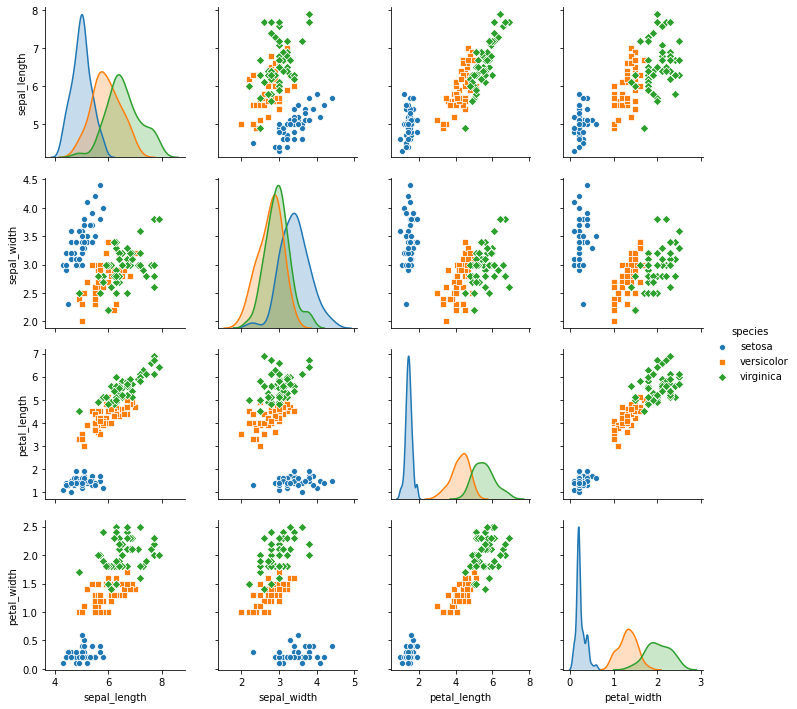

In [99]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"]);

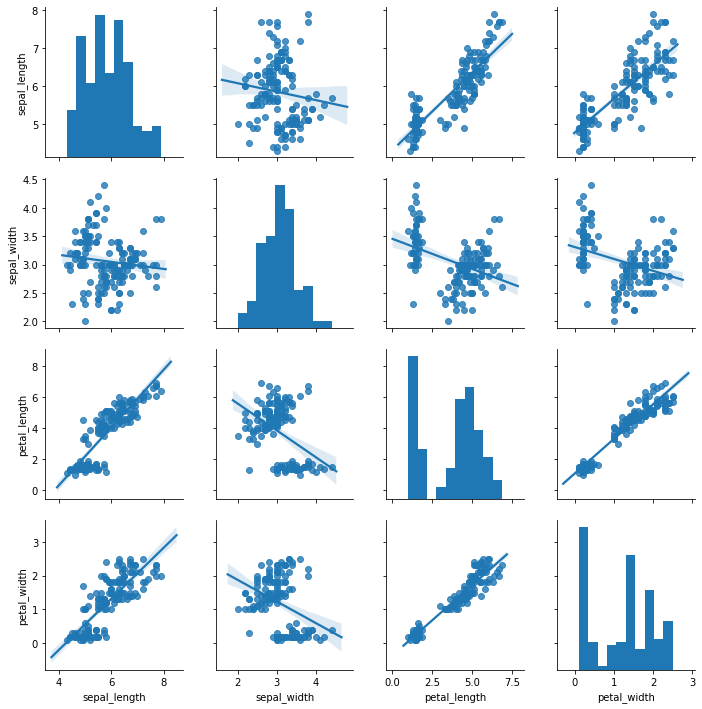

In [100]:
sns.pairplot(df, kind='reg');

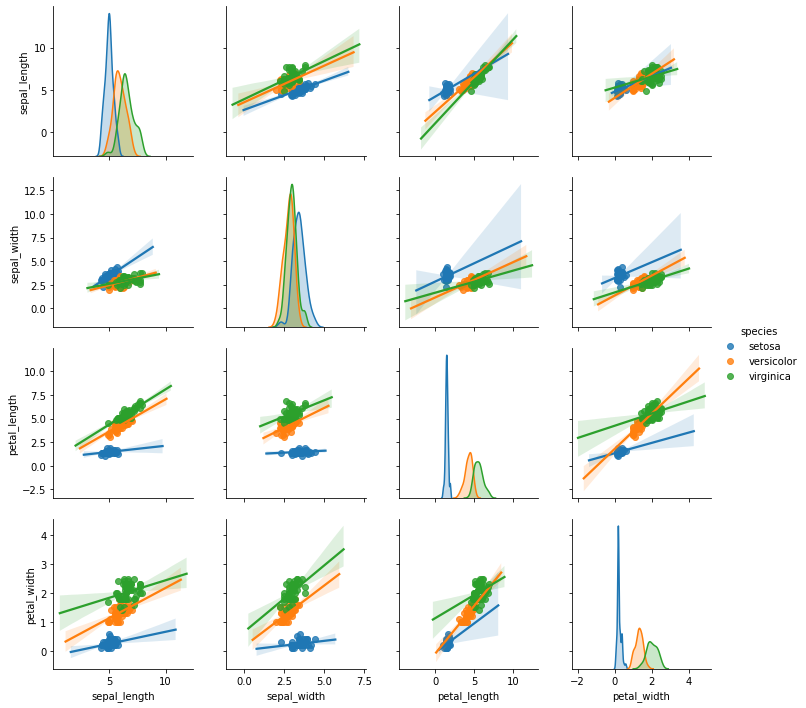

In [101]:
sns.pairplot(df, hue='species', kind='reg');

# Heatmap

In [102]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [103]:
df.shape

(144, 3)

In [105]:
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [107]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [109]:
df = df.pivot("month", "year", "passengers");

In [110]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


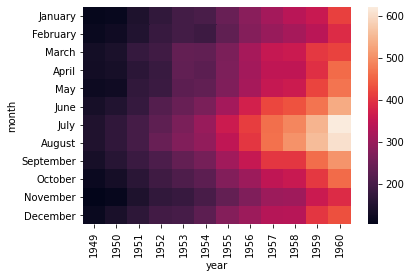

In [112]:
sns.heatmap(df);

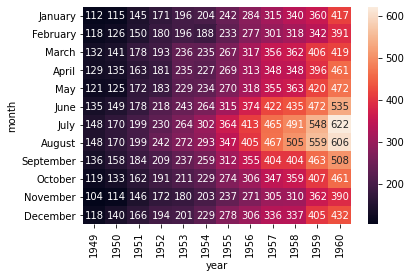

In [113]:
sns.heatmap(df, annot=True, fmt='d');

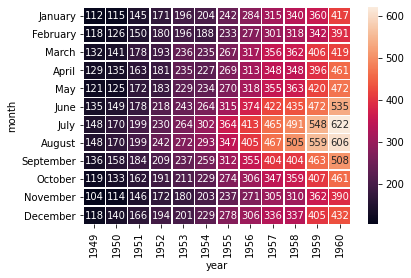

In [114]:
sns.heatmap(df, annot=True, fmt='d', linewidths=0.5);

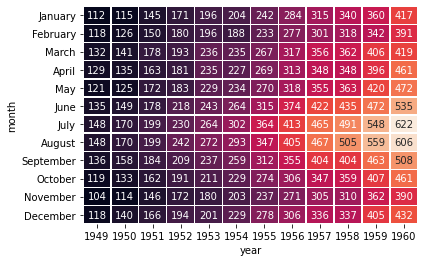

In [116]:
sns.heatmap(df, annot=True, fmt='d', linewidths=0.5, cbar=False);

# Çizgi Grafik

In [117]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [118]:
df.shape

(1064, 5)

In [119]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [120]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [121]:
df.groupby('timepoint')['signal'].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [123]:
df.groupby('signal').count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


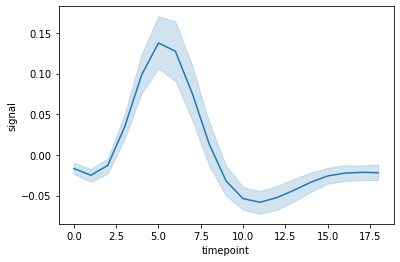

In [124]:
sns.lineplot(x='timepoint', y='signal', data=df)